In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("ProgressBars")

  Activating project at `~/Desktop/PhD_Stuff/cheb_bessel_tests-main`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/PhD_Stuff/cheb_bessel_tests-main/Project.toml`
  No Changes to `~/Desktop/PhD_Stuff/cheb_bessel_tests-main/Manifest.toml`
Precompiling project...
  ✓ Interpolations
  ✓ CUDA → ChainRulesCoreExt
  ✓ Interpolations → InterpolationsUnitfulExt
  3 dependencies successfully precompiled in 6 seconds. 287 already precompiled.


In [2]:
using BenchmarkTools
using LinearAlgebra
using DataInterpolations
using SpecialFunctions
using HCubature
using QuadGK
using Polynomials
using Plots
using FastChebInterp
using ProgressBars
using LaTeXStrings
#using Arblib
using Bessels

[ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
[ Info: Precompiling HCubature [19dc6840-f33b-545b-b366-655c7e3ffd49]
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
Precompiling IJuliaExt
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  ✓ Plots → IJuliaExt
  3 dependencies successfully precompiled in 42 seconds. 177 already precompiled.
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
┌ Warning: Module Plots with build ID fafbfcfd-567a-ef20-0001-370a74b4de57 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1942
[ Info: Skipping precompilation since __precompile__(false). Importing IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a].
[ Info: Precompiling FastChebInterp [cf66c380-9a80-432c-aff8-4f9c79c0bdde]
[ Info: Precompiling SpecialFunctionsChainRulesCoreExt [9eb7bdd4-e44c-55fc-b9cc-1a32cb715188

In [3]:
function eval_polygrid(cb::FastChebInterp.ChebPoly, l) #calcola i cheb poly su una griglia 
    n = length(cb.coefs)
    grid = zeros(length(l), n)

    for i in 1:n
        base_coefs = zero(cb) #uso l'oggetto che interpola con i polinomi di cheb. Li sto azzerando tutti ma mantenendo la shape di cb
        base_coefs.coefs[i] = 1
        grid[:,i] = base_coefs.(l)
    end
    return grid
end

eval_polygrid (generic function with 1 method)

In [4]:
? FastChebInterp.ChebPoly

```
ChebPoly
```

A multidimensional Chebyshev-polynomial interpolation object. Given a `c::ChebPoly`, you can evaluate it at a point `x` with `c(x)`, where `x` is a vector (or a scalar if `c` is 1d).

---

```
(interp::ChebPoly)(x)
```

Evaluate the Chebyshev polynomial given by `interp` at the point `x`.


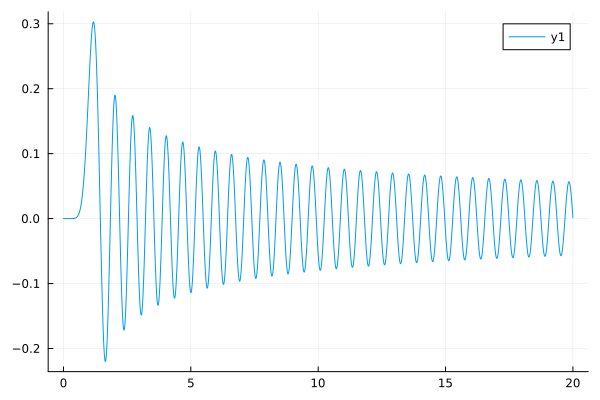

In [5]:
y = LinRange(0,20, 50000)
plot(y, SpecialFunctions.besselj.(10, 10y)) #plot per vedere le bessel

In [6]:
#cheb interpolation della bessel: epic fail 
xmin = 0
xmax = 0.8
y = LinRange(xmin, xmax, 50000)
x = chebpoints(1024, xmin, xmax)
α = 70009.12
β = 3212.78
ℓ = 2
cb = chebinterp(SpecialFunctions.besselj.(ℓ, α*x), xmin, xmax)
#@benchmark chebinterp(SpecialFunctions.besselj.(ℓ, α*x), xmin, xmax)

ChebPoly{1,Float64,Float64} order (1024,) polynomial on [0.0,0.8]

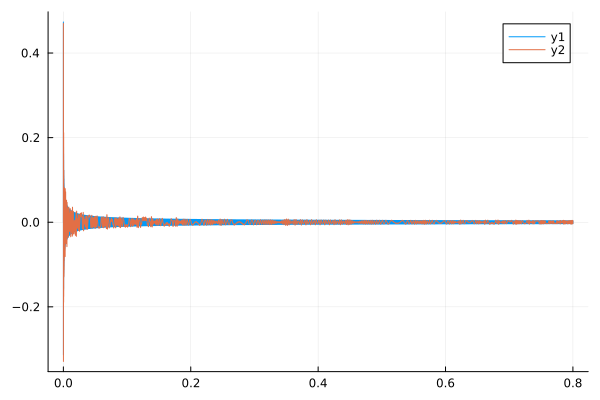

In [7]:
plot(y, SpecialFunctions.besselj.(ℓ, α*y))
plot!(y, cb.(y)) #cb è l'interpolante

le bessel non sono interpolabili con Cheb

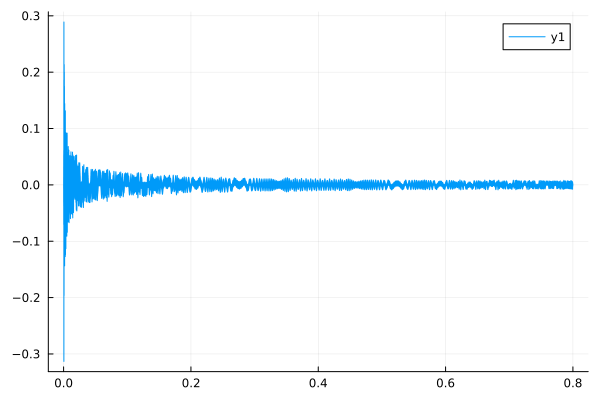

In [8]:
plot(y, SpecialFunctions.besselj.(ℓ, α*y).-cb.(y)) #differenza

In [9]:
test_f(x) = cos(100x) #test con un coseno

benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * test_f(x) * x^2 # why x^2?
@time int1, err1 = hquadrature(benchmark_f, -0, 1; rtol=sqrt(1e-11), atol=0, maxevals=typemax(Int), initdiv=1)
#integrale da 0 a 1 della doppia bessel con il cos come funzione test

  0.916043 seconds (7.23 M allocations: 131.057 MiB, 1.42% gc time, 3.19% compilation time)


(1.6689458614682896e-10, 5.265817298170909e-16)

In [10]:
x = chebpoints(164, -1, 1)
cb = chebinterp(test_f.(x), -1, 1)
benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * cb(x) * x^2
@time int2, err2 = hquadrature(benchmark_f, -0, 1; rtol=sqrt(1e-11), atol=0, maxevals=typemax(Int), initdiv=1)
# same ma con il coseno interpolato con cheb

  1.047016 seconds (7.82 M allocations: 146.599 MiB, 1.26% gc time, 1.53% compilation time)


(1.6689458614685736e-10, 5.26581840227404e-16)

hquadrature: quadratura adattiva, aggiunge punti all'integrale quando necessario 

In [11]:
1-int1/int2

1.701971896750365e-13

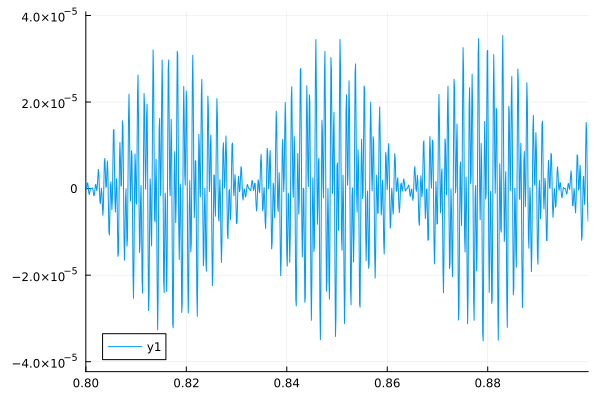

In [12]:
y = LinRange(-1,1,20000)
plot(y, benchmark_f.(y), xlim = [0.8,0.9])

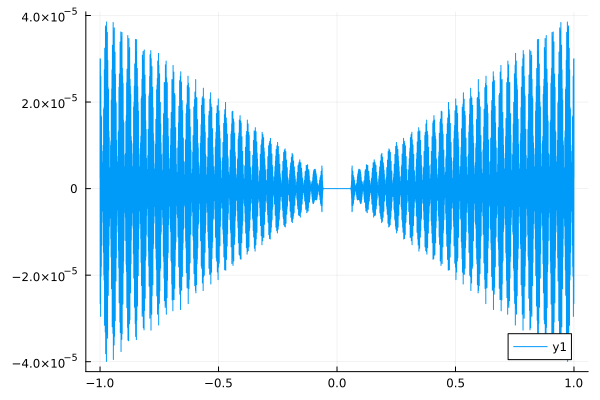

In [13]:
plot(y, benchmark_f.(y))

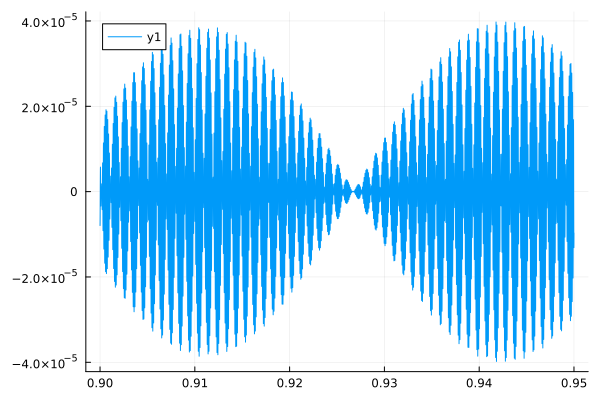

In [14]:
myy = LinRange(0.9, 0.95, 10000)
plot(myy, benchmark_f.(myy))#, xlim = [0.9,0.95])

### Capire meglio cosa fa questa cella

In [ ]:
pippolina = zeros(165) #l points?
pippo = LinRange(-1, 1,30000) #cheb points?
PolyGrid = eval_polygrid(cb, pippo)
for i in ProgressBar(1:165)
    A = QuadraticSpline(PolyGrid[:,i], pippo) #cosa fa lo spline? Interpola tra i cheb points? praticamente A è l'approssimazione del power spectrum
    benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * A(x) * x^2 #perchè bessel di ordine 200? 
    int, err = hquadrature(benchmark_f, -0, 1; rtol=sqrt(1e-11), atol=0, maxevals=typemax(Int), initdiv=1)
    pippolina[i] = int
end
dot(cb.coefs, pippolina)./int1 # integrale in k, prodotto finale. why /int1?

In [ ]:
plot(cb.coefs)

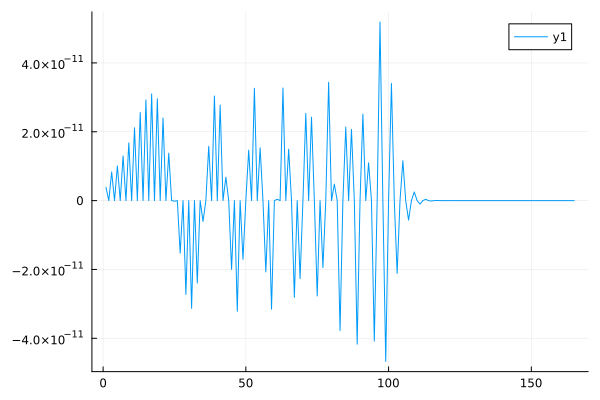

In [18]:
plot(pippolina.*cb.coefs)

In [19]:
100*(1-dot(cb.coefs, pippolina)./int1)

0.08780053796058063

In [20]:
100*(1-dot(cb.coefs, pippolina)./int2)

0.08780053797758924

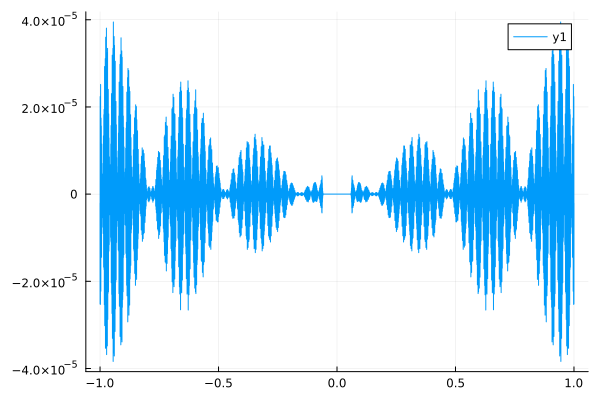

In [21]:
f(x) = cos(100x)*cos(10x)
benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * f(x) * x^2
plot(y, benchmark_f.(y))

In [22]:
@time int1, err = hquadrature(benchmark_f, -1, 1; rtol=sqrt(1e-11), atol=0, maxevals=typemax(Int), initdiv=1)

LoadError: cannot assign a value to imported variable MainInclude.err from module Main

In [1]:
? hquadrature

search:

Couldn't find hquadrature
Perhaps you meant enumerate


No documentation found.

Binding `hquadrature` does not exist.


In [23]:
x = chebpoints(164, -1, 1)
cb = chebinterp(f.(x), -1, 1)
benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * cb(x) * x^2
@time int2, err = hquadrature(benchmark_f, -1, 1; rtol=sqrt(1e-11), atol=0, maxevals=typemax(Int), initdiv=1)

LoadError: cannot assign a value to imported variable MainInclude.err from module Main

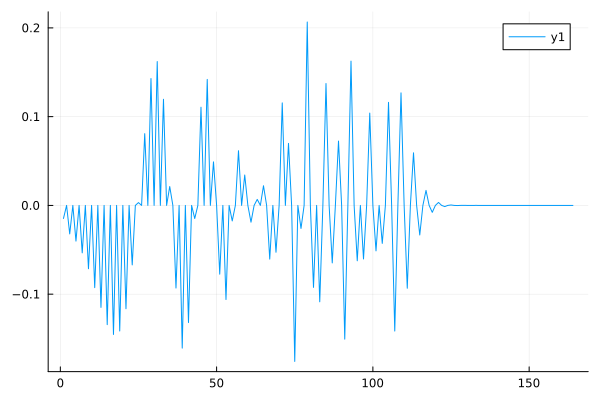

In [24]:
plot(cb.coefs)

In [25]:
100*(1-dot(cb.coefs, pippolina[1:164])./int1)

50.03906597680472

In [26]:
100*(1-dot(cb.coefs, pippolina[1:164])./int2)

50.03906597682337

In [ ]:
pippolino = zeros(165)
for i in ProgressBar(1:165)
    A = QuadraticSpline(PolyGrid[:,i], pippo)
    benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * A(x) * x^2
    int, err = hquadrature(benchmark_f, -1, 1; rtol=sqrt(1e-9), atol=0, maxevals=typemax(Int), initdiv=1)
    pippolino[i] = int
end

0.0%┣                                              ┫ 0/165 [00:00<00:00, -0s/it]


In [ ]:
100*(1-dot(cb.coefs, pippolino[1:164])./int1)

In [ ]:
100*(1-dot(cb.coefs, pippolino[1:164])./int2)

In [ ]:
function eval_polygrid(cb::FastChebInterp.ChebPoly, l)
    n = length(cb.coefs)
    grid = zeros(length(l), n)

    for i in 1:n
        base_coefs = zero(cb)
        base_coefs.coefs[i] = 1
        grid[:,i] = base_coefs.(l)
    end
    return grid
end

# A more refined method

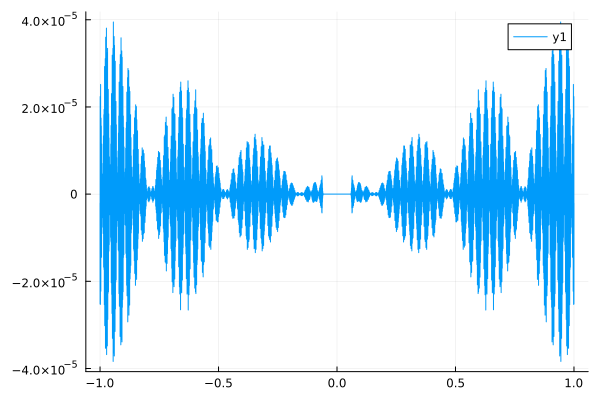

In [15]:
f(x) = cos(100x)*cos(10x)
benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * f(x) * x^2
plot(y, benchmark_f.(y))

In [16]:
@time int1, err1 = hquadrature(benchmark_f, -0, 1; rtol=sqrt(1e-11), atol=0, maxevals=typemax(Int), initdiv=1)

  0.872358 seconds (7.15 M allocations: 127.456 MiB, 0.95% gc time)


(-1.4003033469124558e-10, 4.418397075531026e-16)

Calcolo l'integrale della funzione esatta con metodo di quadratura adattivo

In [17]:
x = chebpoints(164, -1, 1)
cb = chebinterp(f.(x), -1, 1)
benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * cb(x) * x^2
int2, err2 = hquadrature(benchmark_f, -0, 1; rtol=sqrt(1e-11), atol=0, maxevals=typemax(Int), initdiv=1)

(-1.4003033469123178e-10, 4.4183977350842154e-16)

Calcolo l'integrale della funzione approssimata con i chebyshev

In [18]:
cb.coefs

164-element Vector{Float64}:
 -0.014715975268162615
 -2.926265863203354e-16
 -0.032138438038184884
  1.9601141623895412e-16
 -0.04021849906638826
 -9.305910581456979e-17
 -0.05348286985628186
 -7.235102303578478e-16
 -0.07138073926558744
  3.790951302427482e-16
 -0.09266004248450312
  1.5284038480997016e-15
 -0.11494747216710528
  ⋮
  1.4267611482509671e-12
 -7.918656463971587e-16
 -2.5330415272081864e-13
  1.0087323832995668e-16
  4.440350526293492e-14
  1.1980628768592103e-15
 -7.240820409384557e-15
 -5.554736122286619e-16
  8.069425886299919e-16
  5.662514653024644e-16
 -5.984372888833161e-16
 -5.231165506755875e-16

In [19]:
copy_cb = deepcopy(cb)
copy_cb.coefs .*= 0;

In [20]:
#calcolo l'integrale per ogni coefficiente/cheb poly
pippolina = zeros(164) #cheb points to approximate the function
for i in ProgressBar(1:164)
    copy_cb.coefs .*= 0
    copy_cb.coefs[i] = 1.
    benchmark_f(x) = SpecialFunctions.besselj.(200, α * x) * SpecialFunctions.besselj.(200, β * x) * copy_cb.(x) * x^2 #non manca il chebpoly?
    int, err = hquadrature(benchmark_f, -0, 1; rtol=sqrt(1e-11), atol=0, maxevals=typemax(Int), initdiv=1)
    pippolina[i] = int
end
#a questo punto faccio coefficiente x integrale specifico. è il risultato dell'integrale in k.
#lo divido per l'integrale esatto. Mi aspetto qualcosa di molto vicino ad 1 
dot(cb.coefs, pippolina)./int1

0.0%┣                                             ┫ 0/164 [00:01<-2:-59, -1s/it]
0.6%┣▎                                         ┫ 1/164 [00:02<Inf:Inf, InfGs/it]
1.2%┣▋                                              ┫ 2/164 [00:04<10:11, 4s/it]
1.8%┣▉                                              ┫ 3/164 [00:05<06:51, 3s/it]
2.4%┣█▏                                             ┫ 4/164 [00:06<05:43, 2s/it]
3.0%┣█▍                                             ┫ 5/164 [00:08<05:09, 2s/it]
3.7%┣█▊                                             ┫ 6/164 [00:09<04:48, 2s/it]
4.3%┣██                                             ┫ 7/164 [00:10<04:33, 2s/it]
4.9%┣██▎                                            ┫ 8/164 [00:12<04:22, 2s/it]
5.5%┣██▋                                            ┫ 9/164 [00:13<04:12, 2s/it]
6.1%┣██▉                                           ┫ 10/164 [00:14<04:05, 2s/it]
6.7%┣███                                           ┫ 11/164 [00:16<03:59, 2s/it]
7.3%┣███▍                   

0.9999999605507021

la mia domanda è: cb è l'oggetto chebinterb: contiene i coefficienti dell'espansione E i polinomi? Quindi qua sto facendo besselxbesselxChebPoly? 

In [21]:
100*(1-dot(cb.coefs, pippolina[1:164])./int1)

3.944929793942009e-6

In [22]:
100*(1-dot(cb.coefs, pippolina)./int2)

3.944919946263781e-6

In [23]:
int1/int2

1.0000000000000986

In [24]:
dot(cb.coefs, pippolina)./int2

0.9999999605508005

Qual è la differenza tra questa cella e int2? Solo che qua lo faccio a mano per ogni cheb point? Da dove viene la differenza tra i due risultati?

# Let's try with something close to the $P(k)$

Approssimazione polinomiale del pk. 
Nei benchmark faremo eisensetin e hu + N5K challenge 

In [15]:
function TGA(k, ωb, ωm)
    y = k / (ωm - ωb)
    return (1 + 56.4933 * y^1.48261 + 3559.23* y^3.76407 + 4982.44 *y^5.68246 + 374.167* y^7.14558)^(-0.25)
end

function Pk(k, ωb, ωm, ns)
    return k^ns * TGA(k, ωm, ωb)^2
end

@benchmark TGA($1, $0.02, $0.1)

BenchmarkTools.Trial: 10000 samples with 962 evaluations.
 Range (min … max):  86.711 ns … 230.597 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     86.842 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   87.816 ns ±   3.170 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▆█▂            ▁▄         ▃ ▃▂                            ▄▁ ▁
  ███▇▅▆▆▆▆▆▅▄▅▅▄██▇▅▅▆▅▅▃▅▄████▇▆▄▅▄▅▁▅▄▅▅▇▆▇▆▆▅▄▅▄▄▄▅▃▅▃▃███ █
  86.7 ns       Histogram: log(frequency) by time      93.3 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

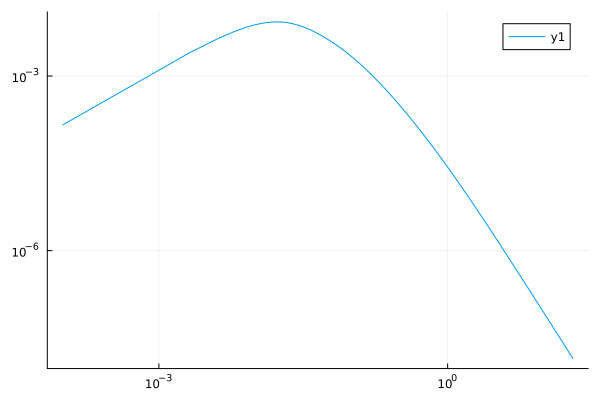

In [16]:
k = LinRange(1e-4, 20, 10000)
plot(k, Pk.(k, 0.15, 0.02, 0.96), xscale=:log10, yscale=:log10)

In [17]:
#l'interpolazione si fa in log(k)
kmax = 200/13 #sono dati da l e k_min e K-Max, sono gli stessi di n5k
kmin = 2.5/7000
n_cheb = 128
k = LinRange(kmin, kmax, 40000)
x = chebpoints(n_cheb, log10(kmin), log10(kmax))
c = chebinterp(Pk.(10 .^x, 0.15, 0.02, 0.96), log10(kmin), log10(kmax))

ChebPoly{1,Float64,Float64} order (128,) polynomial on [-3.4471580313422194,1.1870866433571445]

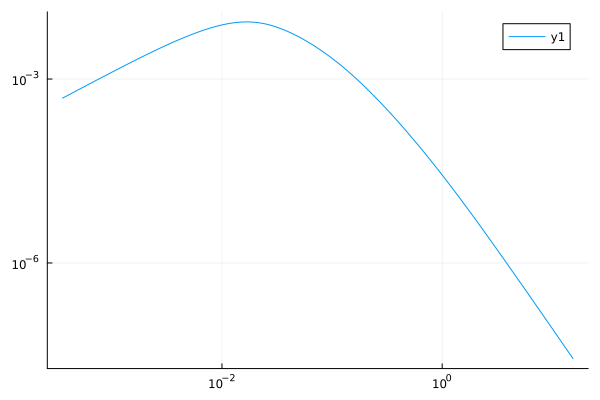

In [18]:
plot(k, c.(log10.(k)), xscale=:log10, yscale=:log10) 

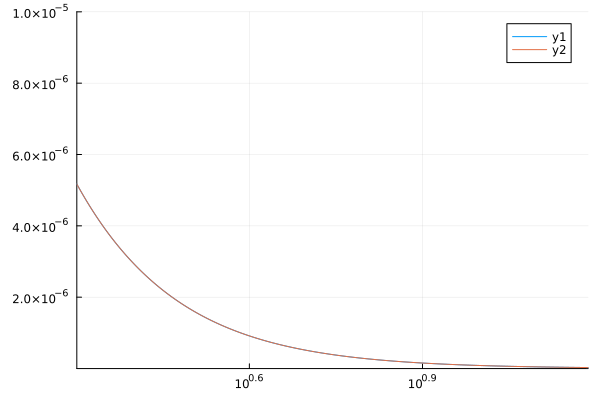

In [19]:
k = LinRange(kmin, kmax, 10000)
plot(k, c.(log10.(k)), xscale=:log10, xlim =[2,kmax], ylim =[1e-10,1e-5])
plot!(k, Pk.(k, 0.15, 0.02, 0.96), xscale=:log10, xlim =[2,kmax], ylim =[1e-10,1e-5])#, yscale=:log10)

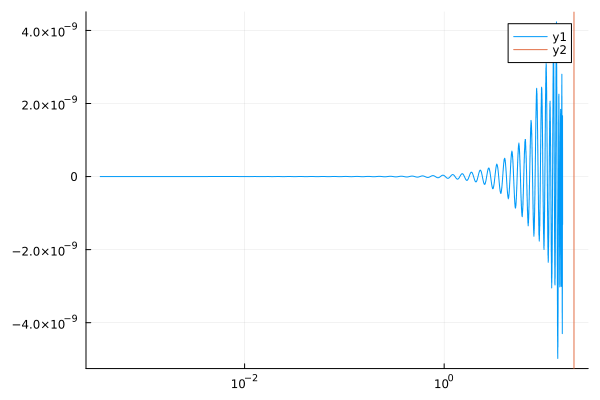

In [20]:
plot(k, 100 .*(1 .-c.(log10.(k))./Pk.(k, 0.15, 0.02, 0.96)), xscale=:log10)
vline!([20])

Qui sto interpolando il power spectrum con i cheb. SI vede che i residui già piccoli con solo 128 punti (in k, legati al grado del polinomio). -> high precision

In [21]:
α = 12.34 #709.12
β = 7000.65
ℓ = 2
benchmark_f(x) = Bessels.sphericalbesselj.(ℓ, α * x) * SpecialFunctions.sphericalbesselj.(ℓ, β * x) * Pk.(x, 0.15, 0.02, 0.96)
@time int1, err3 = hquadrature(benchmark_f, kmin, kmax; rtol=sqrt(1e-7), atol=0, maxevals=typemax(Int), initdiv=1)

  0.353819 seconds (5.71 M allocations: 111.869 MiB, 3.19% gc time, 23.07% compilation time)


(3.6708565202286133e-14, 1.159976054771306e-17)

sto integrando besselXbesselXpk e sotto xC (interp)

In [22]:
benchmark_f(x) = Bessels.sphericalbesselj.(ℓ, α * x) * SpecialFunctions.sphericalbesselj.(ℓ, β * x) * c.(log10(x))
@time int2, err4 = hquadrature(benchmark_f, kmin, kmax; rtol=sqrt(1e-7), atol=0, maxevals=typemax(Int), initdiv=1)

  0.557591 seconds (6.99 M allocations: 162.543 MiB, 1.99% gc time, 9.16% compilation time: 84% of which was recompilation)


(3.670856520265537e-14, 1.1599760744276444e-17)

In [23]:
1-abs(int1/int2)

1.0058620603103918e-11

la differenza percetuale tra i due integrali è piccolissima! 

In [24]:
nχ = 150
ℓ = 200
χ = LinRange(13, 7000, nχ) 
#χ = round.(χ, digits=2) 

150-element LinRange{Float64, Int64}:
 13.0, 59.8926, 106.785, 153.678, …, 6859.32, 6906.21, 6953.11, 7000.0

In [25]:
function integral!(result, f, kmin, kmax, i, j)
    int, err = hquadrature(f, kmin, kmax; rtol=sqrt(1e-11), atol=0, maxevals=Int(1e7), initdiv=1)
    result[i,j] = int
    result[j,i] = int
    return nothing
end

integral! (generic function with 1 method)

In [26]:
#parallelizzato con i threads (figure them out)
result1 = zeros(nχ, nχ)#oggetto dove salvare il risultato. 
result2 = zeros(nχ, nχ)
function my_f!!(result1, result2, ℓ, χ, kmin, kmax, c)
    @time for i in 1:nχ
        Threads.@threads for j in i:nχ
            benchmark_f(x) = Bessels.sphericalbesselj.(ℓ, χ[i] * x) * Bessels.sphericalbesselj.(ℓ, χ[j] * x) * Pk.(x, 0.15, 0.02, 0.96)
            integral!(result1, benchmark_f, kmin, kmax, i, j)
            #approx_f(x) = Bessels.sphericalbesselj.(ℓ, χ[i] * x) * Bessels.sphericalbesselj.(ℓ, χ[j] * x) * c.(log10(x))
            #integral!(result2, approx_f, kmin, kmax, i, j)
        end
    end
end

my_f!! (generic function with 1 method)

In [ ]:
my_f!!(result1, result2, ℓ, χ, kmin, kmax, c)

Sto integrando brute force, per questo è lento! Se nel weekend mi ricordo di lanciarlo posso anche fare il conto, ma Marco ha messo i plot dei risultati su notion. Per calcolare l'approssimazione con i chebyshev bisogna scommentare le due righe di codice nella cella precedente. 

In [ ]:
my_f!!(result1, result2, ℓ, χ, kmin, kmax, c)

In [ ]:
difference = 1 .- result1./result2;

In [ ]:
heatmap(log10.(abs.(result1./maximum(result1))))

In [ ]:
heatmap(log10.(abs.(result2./maximum(result2))))200

In [ ]:
heatmap(log10.(abs.(difference)))

In [ ]:
yourlabelslist = [round(χ[i], sigdigits=2) for i in 1:99:1000]#crea le label degli assi del grafico
p = heatmap(log10.(abs.(result1./maximum(result1))), aspect_ratio=1, size = [800,770], xlabel = L"\chi[\mathrm{Mpc}]", ylabel = L"\chi[\mathrm{Mpc}]", xticks=(1:99:1000, yourlabelslist), yticks=(1:99:1000, yourlabelslist), xformatter=:latex)
#savefig(p, "integrals.png")
#savefig(p, "integrals.pdf")
p

In [ ]:
yourlabelslist = [round(χ[i], sigdigits=2) for i in 1:99:1000]
p = heatmap(log10.(abs.(difference)), aspect_ratio=1, size = [800,770], xlabel = L"\chi[\mathrm{Mpc}]", ylabel = L"\chi[\mathrm{Mpc}]", xticks=(1:99:1000, yourlabelslist), yticks=(1:99:1000, yourlabelslist))
#savefig(p, "residuals.png")
#savefig(p, "residuals.pdf")
p

Ora che ho calcolato gli integrali, devo moltiplicarli ai coefficienti di chebyshev. 
Sono un po' confusa onestamente, devo capire bene che pezzi dell'integrale sono. Probabilmente in realtà il codice sopra è la matrice dei coefficienti e ora devo effettivamente integrare i cheby con la doppia bessel. Alla fine moltiplico e sommo tutti i termini. 
Il problema di fondo è: come sono definiti i coefficienti $c_n(\chi_1,\chi_2)$? Come li calcolo? Secondo me questo dettaglio potrebbe decisamente chiarirmi le idee. 

In [ ]:
#devo sommare coeff a segni alternati (numericalmente instabili)
#uso una relazione di riccorrenza per i cheb, che è stabile 
#integro contro i polinomi di cheb 
function cheb_integral(n_cheb, i, j, ℓ, χ, cb)
    pippolina = zeros(n_cheb+1)
    Threads.@threads for myi in 1:n_cheb+1
        copy_cb = deepcopy(cb) #copio l'interpolante 
        copy_cb.coefs .*= 0 #azzero i coeff del polinomio
        copy_cb.coefs[myi] = 1. #tranne quello in posizione i (quello che voglio interpolare)
        benchmark_f(x) = Bessels.sphericalbesselj.(ℓ, χ[i] * x) * Bessels.sphericalbesselj.(ℓ, χ[j] * x) * copy_cb.(log10(x))
        int, err = hquadrature(benchmark_f, kmin, kmax; rtol=sqrt(1e-11), atol=0, maxevals=Int(1e9), initdiv=1)
        pippolina[myi] = int
    end
    return pippolina
end
#pippolina x cheb coeff mi dà l'integrale in k nel bin i,j (di χ)

In [ ]:
function cheb_integral_quad(n_cheb, i, j, ℓ, χ, cb)
    pippolina = zeros(n_cheb+1)
    Threads.@threads for myi in 1:n_cheb+1
        copy_cb = deepcopy(cb)
        copy_cb.coefs .*= 0
        copy_cb.coefs[myi] = 1.
        benchmark_f(x) = Bessels.sphericalbesselj.(ℓ, χ[i] * x) * Bessels.sphericalbesselj.(ℓ, χ[j] * x) * copy_cb.(log10(x))
        int, err, count = quadgk_count(benchmark_f, kmin, kmax; rtol=sqrt(1e-11), atol=0)
        #println(count)#uncomment if you wanna see the number of functions evaluations
        pippolina[myi] = int
    end
    return pippolina
end
#same ma con altro metodo

In [ ]:
i=40
j=39
@time pippomio = cheb_integral(n_cheb, i, j, ℓ, χ, c)
println(χ[i]/χ[j])
println(result1[i,j]/maximum(result1))
myresult = dot(c.coefs, pippomio)

In [ ]:
@time pippomio = cheb_integral_quad(n_cheb, i, j, ℓ, χ, c)
println(χ[i]/χ[j])
println(result1[i,j]/maximum(result1))
myresult = dot(c.coefs, pippomio)

In [ ]:
hope[i,j] #what is this cell?

In [ ]:
result1[i,j]

In [ ]:
100*(1-result2[i,j]./result1[i,j])

In [ ]:
100*(1-myresult./result1[i,j])

In [ ]:
100*(1-myresult./result2[i,j])

In [ ]:
heatmap(log10.(abs.(result1./maximum(result1))))

In [ ]:
function last_check(n_cheb, ℓ, χ, c, nχ)
    myresult = zeros(nχ, nχ)
    for i in 1:nχ
        for j in i:nχ
            result = cheb_integral(n_cheb, i, j, ℓ, χ, c)
            result = dot(c.coefs, result) #questo è l'integrale in k nel punto i,j
            myresult[i,j] = result
            myresult[j,i] = myresult[i,j]
            println(i, " ", j)
        end
    end
    return myresult
end

#se l'integrale è piccolo rispetto al max non lo calcolo (time saver)
function last_check_safe(n_cheb, ℓ, χ, c, nχ, result)
    myresult = zeros(nχ, nχ)
    for i in 1:nχ
        for j in i:nχ
            if result[i,j]/maximum(result) > 1e-6
                myresult_float = cheb_integral(n_cheb, i, j, ℓ, χ, c)
                myresult_float = dot(c.coefs, myresult_float)
                myresult[i,j] = myresult_float
                myresult[j,i] = myresult[i,j]
                println(i, " ", j, " Computed")
            else
                println(i, " ", j, " Skipped!")
            end
        end
    end
    return myresult
end
#faccio i conti solo lungo la diagonale, i=j, è dove pesa di più

In [ ]:
@time hope = last_check_safe(n_cheb, ℓ, χ, c, nχ, result1);

In [ ]:
difference = 1 .- hope./result1; #hope è con la cheb interp, result1 è il calcolo brute force

In [ ]:
heatmap(log10.(abs.(difference)))

In [ ]:
sort(100 .* abs.(diag(difference)), rev=true) #prendo la diagonale perchè è ciò che conta di più nell'integrale.
#è un sort dei residui

In [ ]:
heatmap(log10.(abs.(hope./maximum(hope))))

In [ ]:
plot(diag(hope), yscale=:log10)

In [ ]:
plot(diag(result1), yscale=:log10)

In [ ]:
100 .* sort(abs.(difference)[findall(<(1), abs.(difference))])

In [ ]:
abs.(difference)

In [ ]:
x = chebpoints(20, -1, 1)